### 라이브러리 임포트

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import random

### 함수 정의

In [24]:
# 주기적 경계 조건을 처리하기 위한 이웃 함수
def get_neighbors(i, j, L):
    return [
        ((i-1) % L, j),  # 위쪽
        ((i+1) % L, j),  # 아래쪽
        (i, (j-1) % L),  # 왼쪽
        (i, (j+1) % L)   # 오른쪽
    ]

In [25]:
# 루트를 찾는 함수
def find(ptr, x):
    if ptr[x] < 0:
        return x
    else:
        ptr[x] = find(ptr, ptr[x]) # 경로 압축
        return ptr[x]

In [26]:
# 두 집합을 합치는 함수
def union(ptr, r1, r2, big):
    if r2 != r1:
        if ptr[r1] > ptr[r2]:
            ptr[r2] += ptr[r1]
            ptr[r1] = r2
            r1 = r2
        else:
            ptr[r1] += ptr[r2]
            ptr[r2] = r1

        if -ptr[r1] > big:
            big = -ptr[r1]
    return r1, r2, big

In [27]:
# 4N/2 = 2N 개의 bond이므로 right, down 두 가지 방향으로 찾아본다
def bonds(L):
    bond_list = []
    for i in range(L):
        for j in range(L):
            node = i * L + j

            right = i * L + (j + 1) % L
            bond_list.append((node, right)) # 해당 노드와 우측 노드 사이 bond

            down = ((i + 1) % L) * L + j
            bond_list.append((node, down)) # 해당 노드와 하측 노드 사이 bond
    return bond_list

In [31]:
def cluster_flip(array, beta):
    p = 1 - np.exp(-2 * beta)  # p=1-exp(-2*beta)
    L = int(np.sqrt(len(array)))  # assuming array is 1D
    N = L * L
    ptr = [-1] * N  # root 초기화
    size = [1] * N  # size 초기화
    bond_list = bonds(L)  # 본드 생성

    big = 0

    # 클러스터 생성
    for bond in bond_list:
        node, neighbor = bond
        if array[node] == array[neighbor]:
            # 같은 스핀이라면 p의 확률로 accept, 1-p의 확률로 reject
            if np.random.rand() < p:
                r1 = find(ptr, node)
                r2 = find(ptr, neighbor)
                r1, r2, big = union(ptr, r1, r2, big)

    clusters = set()  # 클러스터 사전

    for i in range(N):
        r1 = find(ptr, i)
        clusters.add(r1)

    # 각각의 클러스터를 flip
    for cluster in clusters:
        if random.random() < 0.5:
            for i in range(N):
                if find(ptr, i) == cluster:
                    array[i] *= -1

    return array

### 실행!

In [29]:
betas = np.arange(0.0, 1.1, 0.1).tolist() # x축 plot을 위해 beta 리스트 생성

In [32]:
# 5x5
avg_Ss5 = []  # |<S>|

for beta in betas:
    Ss = []
    array = np.random.choice([-1, 1], size=(5*5))
    for _ in range(10000):
        array = cluster_flip(array, beta)
        s = np.mean(array)
        Ss.append(abs(s))
    avg_Ss5.append(np.mean(Ss))

[0.16201600000000002, 0.20194400000000004, 0.2773840000000001, 0.427904, 0.713608, 0.9159439999999999, 0.972808, 0.990432, 0.99616, 0.998296, 0.9990399999999999]


In [33]:
# 10x10
avg_Ss10 = [] # |<S>|

for beta in betas:
    Ss = []
    array = np.random.choice([-1, 1], size=(10*10))
    for _ in range(10000):
        array = cluster_flip(array, beta)
        s = np.mean(array)
        Ss.append(abs(s))
    avg_Ss10.append(np.mean(Ss))

In [34]:
# 20x20
avg_Ss20 = [] # |<S>|

for beta in betas:
    Ss = []
    array = np.random.choice([-1, 1], size=(20*20))
    for _ in range(10000):
        array = cluster_flip(array, beta)
        s = np.mean(array)
        Ss.append(abs(s))
    avg_Ss20.append(np.mean(Ss))

### Plot!

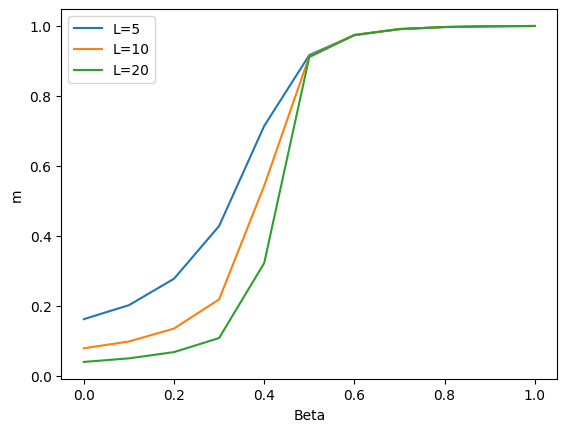

In [35]:
plt.plot(betas, avg_Ss5, label='L=5')
plt.plot(betas, avg_Ss10, label='L=10')
plt.plot(betas, avg_Ss20, label='L=20')

plt.xlabel('Beta')
plt.ylabel('m')
plt.legend()
plt.show()